In [1]:
from datetime import date
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras import layers, Sequential,models
import tensorflow as tf
import pickle
# %matplotlib notebook

In [2]:
data = []
for i in range(4):
    with open(f"../data/result{i}.pkl","rb") as f:
        data.append(pickle.load(f))
print(len(data[0]))

10000


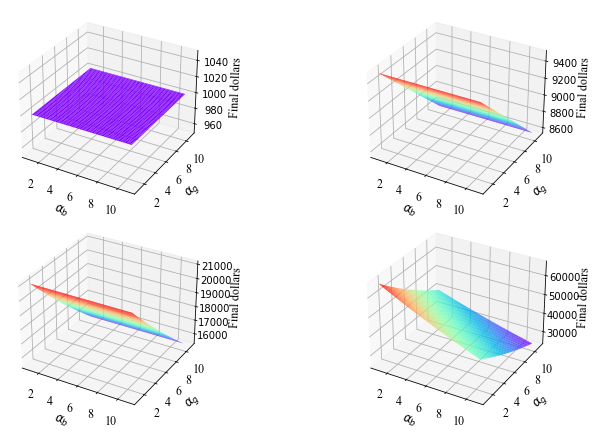

In [3]:
xx = np.arange(1,11,0.1)
yy = np.arange(1,11,0.1)
X, Y = np.meshgrid(yy,xx)

OUT = []
for k in range(4):
    Z = []
    z = list(data[k].values())
    for i in range(100):
        temp = []
        for j in range(100):
            temp.append(z[100*i+j])
        Z.append(temp)
    OUT.append(np.array(Z))


## 画图

fig = plt.figure(figsize=(12, 6), facecolor='w')
size = 12
for i in range(4):
    ax = fig.add_subplot(int(f"22{i+1}"), projection='3d')
    ax.plot_surface(X,Y,OUT[i],cmap='rainbow')
    ax.set_xlabel(r'$\alpha_b$',fontdict={'family':'Times New Roman','size':size})
    ax.set_ylabel(r"$\alpha_g$",fontdict={'family':'Times New Roman','size':size})
    ax.set_zlabel("Final dollars",fontdict={'family':'Times New Roman','size':size})
    plt.xticks(fontproperties = 'Times New Roman', size = size)
    plt.yticks(fontproperties = 'Times New Roman', size = size)

plt.tight_layout()
plt.savefig("../picture/灵敏度分析三维图.png")
plt.show()

In [5]:
for i in range(4):
    print(f"收益下降率：{(OUT[i].max()-OUT[i].min())/OUT[i].max()}")

收益下降率：0.0
收益下降率：0.10000000000000028
收益下降率：0.2710000000000015
收益下降率：0.6351072631145469


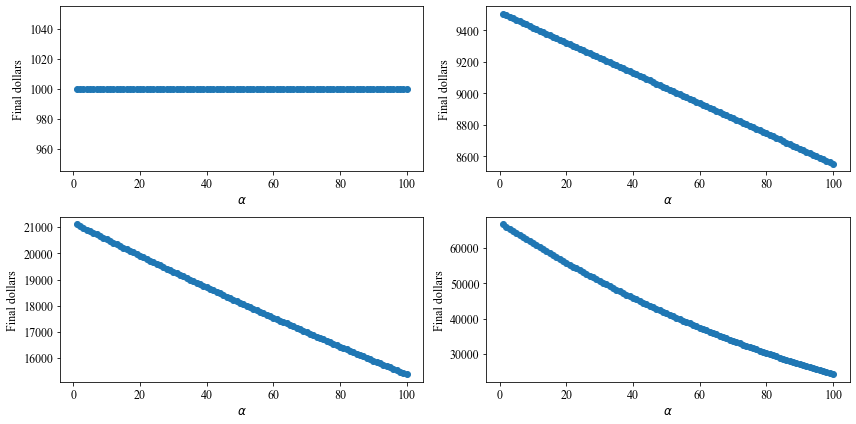

In [6]:
x = [i for i in range(1,101)]
ys = []
for k in range(4):
    temp = OUT[k]
    y = []
    for i in range(100):
        y.append(temp[i][i])
    ys.append(y)

fig = plt.figure(figsize=(12, 6), facecolor='w')
size = 12
for i in range(4):
    ax = fig.add_subplot(int(f"22{i+1}"))
    ax.scatter(x,ys[i])
    plt.xlabel(r"$\alpha$",fontdict={'family':'Times New Roman','size':size})
    plt.ylabel(r"Final dollars",fontdict={'family':'Times New Roman','size':size})
    plt.xticks(fontproperties = 'Times New Roman', size = size)
    plt.yticks(fontproperties = 'Times New Roman', size = size)

plt.tight_layout()
plt.savefig("../picture/灵敏度分析平面图(alpha=beta).png")
plt.show()

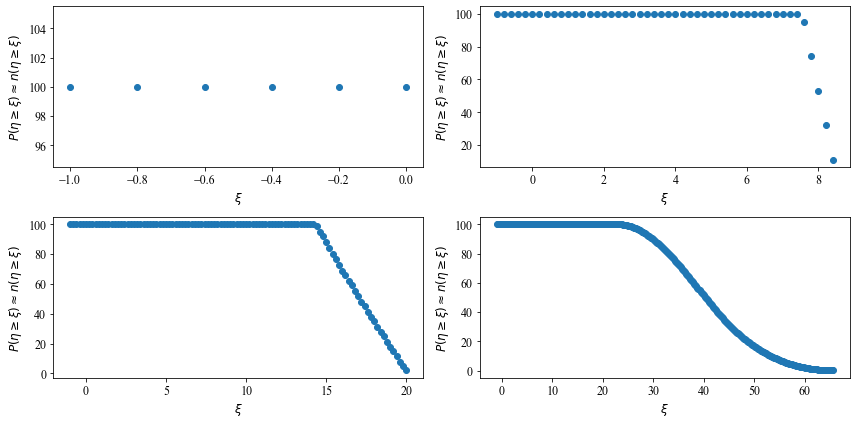

In [7]:
xs = []
ys = []
for k in range(4):
    z = list(data[k].values())
    x = [(i/1000-1) for i in range(0,int(max(z))+1,200)]
    y = []
    temp = sorted(z,reverse=True)
    for i in x:
        count = 0
        for j in temp:
            if j >= (i+1)*1000:
                count += 1
            else:
                break
        y.append(count/100)
    xs.append(x)
    ys.append(y)

fig = plt.figure(figsize=(12, 6), facecolor='w')
size = 12
for i in range(4):
    ax = fig.add_subplot(int(f"22{i+1}"))
    ax.scatter(xs[i],ys[i])
    plt.xlabel(r"$\xi$",fontdict={'family':'Times New Roman','size':size})
    plt.ylabel(r"$P(\eta\geq \xi)\approx n(\eta\geq\xi)$",fontdict={'family':'Times New Roman','size':size})
    plt.xticks(fontproperties = 'Times New Roman', size = size)
    plt.yticks(fontproperties = 'Times New Roman', size = size)

plt.tight_layout()
plt.show()